In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/
!cp /content/drive/MyDrive/nlp-final-project/dontpatronizeme_categories.tsv ./
!cp /content/drive/MyDrive/nlp-final-project/dontpatronizeme_pcl.tsv ./
!cp /content/drive/MyDrive/nlp-final-project/README.txt ./

/content


In [3]:
import random
import os
from urllib import request
import pandas as pd
import numpy as np

In [4]:
module_url = f"https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
#with open("file_1.txt") as f1, open("file_2.txt") as f2
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

Fetching https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py


In [5]:
module_url = f"https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/evaluation.py"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
#with open("file_1.txt") as f1, open("file_2.txt") as f2
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

Fetching https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/evaluation.py


In [6]:
from dont_patronize_me import DontPatronizeMe
# Initialize a dpm (Don't Patronize Me) object.
# It takes two areguments as input: 
# (1) Path to the directory containing the training set files, which is the root directory of this notebook.
# (2) Path to the test set, which will be released when the evaluation phase begins. In this example, 
# we use the dataset for Subtask 1, which the code will load without labels.
dpm = DontPatronizeMe('.', 'dontpatronizeme_pcl.tsv')

In [7]:
# This method loads the subtask 1 data
dpm.load_task1()
# which we can then access as a dataframe
task1_df = dpm.train_task1_df

In [8]:
task2_df = dpm.train_task2_df

In [9]:
task1_df['orig_label'].unique()

array(['0', '1', '2', '3', '4'], dtype=object)

In [10]:
task1_df['orig_label'] =  task1_df['orig_label'].astype(str).astype(int)

In [11]:
def add_prob(row):
  if row['orig_label'] == 1 or row['orig_label'] == 3:
    return 0.5
  else:
    return 1.0

In [12]:
task1_df['probability'] = task1_df.apply(lambda row: add_prob(row), axis=1)

In [13]:
task1_df.head()

,par_id,art_id,keyword,country,text,label,orig_label,probability
0,1,@@24942188,hopeless,ph,"we 're living in times of absolute insanity , ...",0,0,1.0
1,2,@@21968160,migrant,gh,"in libya today , there are countless number of...",0,0,1.0
2,3,@@16584954,immigrant,ie,"""white house press secretary sean spicer said ...",0,0,1.0
3,4,@@7811231,disabled,nz,council customers only signs would be displaye...,0,0,1.0
4,5,@@1494111,refugee,ca,""""""" just like we received migrants fleeing el ...",0,0,1.0


In [14]:
task1_df.head(50)

,par_id,art_id,keyword,country,text,label,orig_label,probability
0,1,@@24942188,hopeless,ph,"we 're living in times of absolute insanity , ...",0,0,1.0
1,2,@@21968160,migrant,gh,"in libya today , there are countless number of...",0,0,1.0
2,3,@@16584954,immigrant,ie,"""white house press secretary sean spicer said ...",0,0,1.0
3,4,@@7811231,disabled,nz,council customers only signs would be displaye...,0,0,1.0
4,5,@@1494111,refugee,ca,""""""" just like we received migrants fleeing el ...",0,0,1.0
5,6,@@9382277,in-need,in,"to bring down high blood sugar levels , insuli...",0,0,1.0
6,7,@@7562079,refugee,za,the european union is making an historic mista...,0,0,1.0
7,8,@@23663488,hopeless,nz,""""""" they 're either hopeless for being beaten ...",0,0,1.0
8,9,@@3449225,homeless,ph,"nueva era , ilocos norte - no family shall be ...",0,1,0.5
9,10,@@2485090,in-need,nz,his spokesman said the kremlin needed more inf...,0,0,1.0


In [15]:
import matplotlib.pyplot as plt

In [16]:
labelwise_grp = task1_df.groupby('probability').count()

In [17]:
labelwise_grp

,par_id,art_id,keyword,country,text,label,orig_label
probability,,,,,,,
0.5,1405,1405,1405,1405,1405,1405,1405
1.0,9064,9064,9064,9064,9064,9064,9064


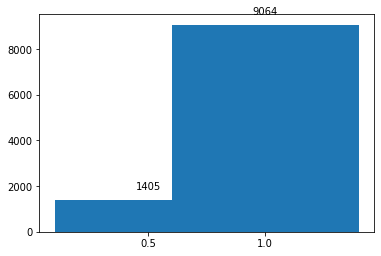

In [18]:
x = labelwise_grp['orig_label'].index.tolist()
y = labelwise_grp['label'].tolist()
plt.bar(x,y)
labels = [0.5,1.0]
plt.xticks(x,labels )
for x,y in zip(x,y):
  label = "{:d}".format(y)
  
  plt.annotate(label, # this is the text
                (x,y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center

plt.show()

In [19]:
disag, agree = labelwise_grp['label'].tolist()
print("Percentage of disagreement from annotators:%2f" %(100*(disag/(disag+agree))))
print("Percentage of agreement from annotators:%2f" %(100*(agree/(disag+agree))))

Percentage of disagreement from annotators:13.420575
Percentage of agreement from annotators:86.579425


In [20]:
labelwise_grp = task1_df.groupby(['country', 'label']).count()
labelwise_grp

par_id  art_id  keyword  text  orig_label  probability
country label                                                        
au      0         504     504      504   504         504          504
        1          37      37       37    37          37           37
bd      0         468     468      468   468         468          468
        1          44      44       44    44          44           44
ca      0         484     484      484   484         484          484
        1          46      46       46    46          46           46
gb      0         483     483      483   483         483          483
        1          57      57       57    57          57           57
gh      0         448     448      448   448         448          448
        1          75      75       75    75          75           75
hk      0         461     461      461   461         461          461
        1          29      29       29    29          29           29
ie      0         485     485      485   485         485          485
        1          52      52       52    52          52           52
in      0         491     491      491   491         491          491
        1          39      39       39    39          39           39
jm      0         433     433      433   433         433          433
        1          57      57       57    57          57           57
ke      0         494     494      494   494         494          494
        1          45      45       45    45          45           45
lk      0         455     455      455   455         455          455
        1          49      49       49    49          49           49
my      0         503     503      503   503         503          503
        1          43      43       43    43          43           43
ng      0         465     465      465   465         465          465
        1          72      72       72    72          72           72
nz      0         471     471      471   471         471          471
        1          47      47       47    47          47           47
ph      0         478     478      478   478         478          478
        1          67      67       67    67          67           67
pk      0         492     492      492   492         492          492
        1          53      53       53    53          53           53
sg      0         497     497      497   497         497          497
        1          38      38       38    38          38           38
tz      0         374     374      374   374         374          374
        1          41      41       41    41          41           41
us      0         499     499      499   499         499          499
        1          44      44       44    44          44           44
za      0         491     491      491   491         491          491
        1          58      58       58    58          58           58

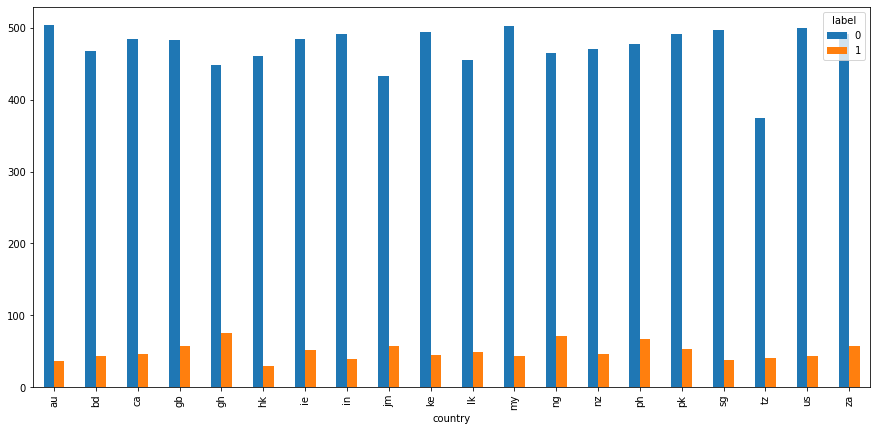

In [21]:
fig, ax = plt.subplots(figsize=(15,7))
labelwise_grp['orig_label'].unstack().plot(ax=ax, kind='bar')

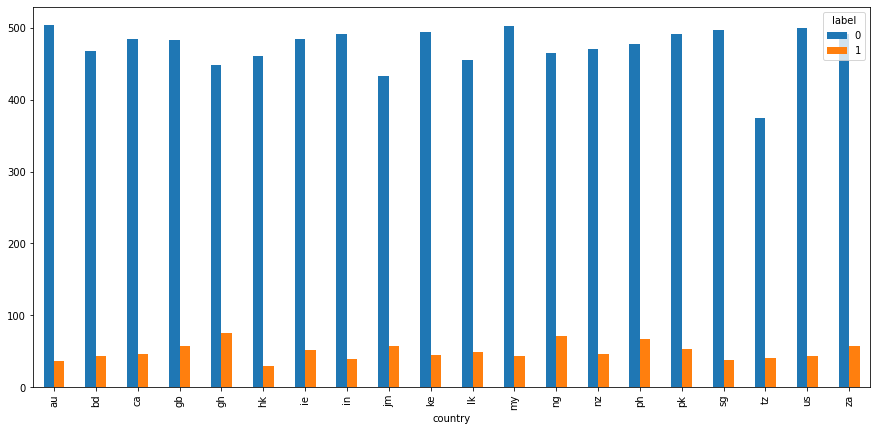

In [22]:
fig, ax = plt.subplots(figsize=(15,7))
labelwise_grp['orig_label'].unstack().plot(ax=ax, kind='bar')

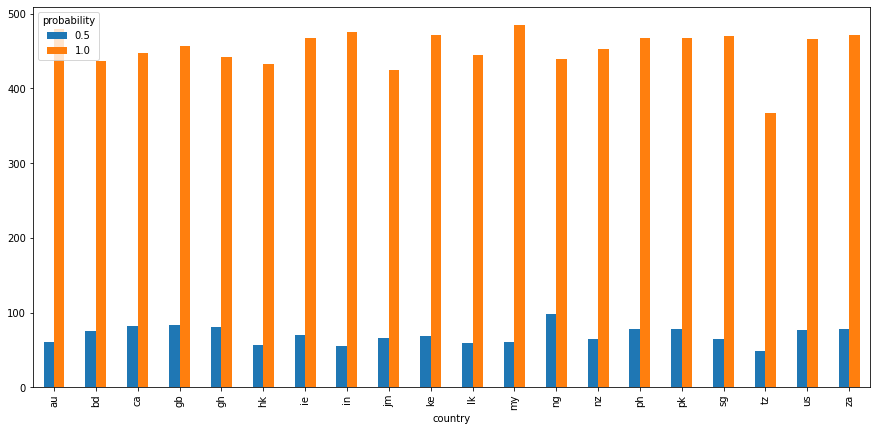

In [23]:
labelwise_grps = task1_df[['country', 'label','probability']].groupby(['country','probability']).count()
fig, ax = plt.subplots(figsize=(15,7))
labelwise_grps['label'].unstack().plot(ax=ax, kind='bar')

In [24]:
keywords = task1_df['keyword'].unique().tolist()
keywords

['hopeless',
 'migrant',
 'immigrant',
 'disabled',
 'refugee',
 'in-need',
 'homeless',
 'vulnerable',
 'women',
 'poor-families']

In [25]:
indices = task1_df[task1_df['text'].str.contains(keywords[0])]['text'].index.tolist()

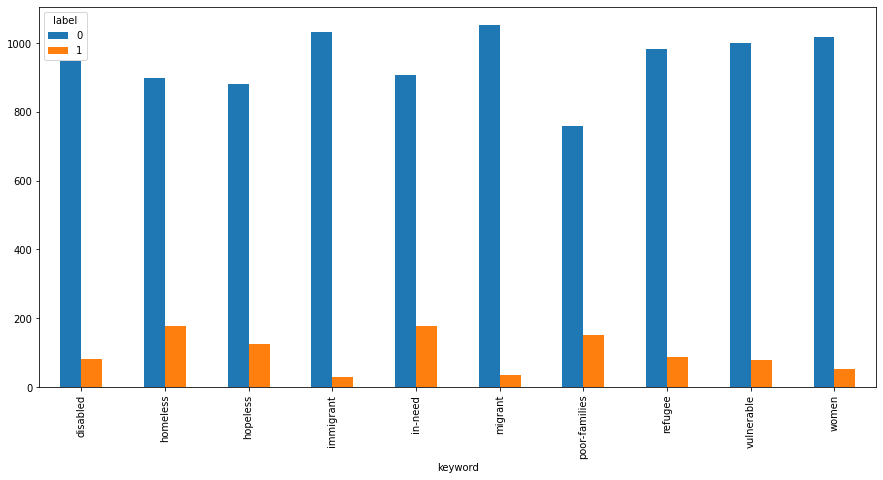

In [26]:
labelwise_grps = task1_df[['country', 'label','keyword']].groupby(['keyword', 'label']).count()
fig, ax = plt.subplots(figsize=(15,7))
labelwise_grps['country'].unstack().plot(ax=ax, kind='bar')

In [27]:
labelwise_grps.T

keyword disabled     homeless      hopeless  ... refugee vulnerable     women    
label          0   1        0    1        0  ...       1          0   1     0   1
country      947  81      899  178      881  ...      86       1000  80  1018  52

[1 rows x 20 columns]

### Installation

In [28]:
!pip install transformers

     |████████████████████████████████| 3.3 MB 13.6 MB/s 
     |████████████████████████████████| 596 kB 66.3 MB/s 
     |████████████████████████████████| 895 kB 70.7 MB/s 
     |████████████████████████████████| 61 kB 647 kB/s 
     |████████████████████████████████| 3.3 MB 57.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [29]:
!pip install datasets

     |████████████████████████████████| 298 kB 12.5 MB/s 
     |████████████████████████████████| 1.1 MB 63.9 MB/s 
     |████████████████████████████████| 243 kB 68.2 MB/s 
     |████████████████████████████████| 132 kB 68.0 MB/s 
     |████████████████████████████████| 160 kB 68.2 MB/s 
     |████████████████████████████████| 192 kB 65.8 MB/s 
     |████████████████████████████████| 271 kB 64.7 MB/s 


In [30]:
!pip install tensorflow

In [31]:
!pip install torch

In [32]:
task1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10469 entries, 0 to 10468
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   par_id       10469 non-null  object 
 1   art_id       10469 non-null  object 
 2   keyword      10469 non-null  object 
 3   country      10469 non-null  object 
 4   text         10469 non-null  object 
 5   label        10469 non-null  int64  
 6   orig_label   10469 non-null  int64  
 7   probability  10469 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 654.4+ KB


## Examine the sentences and understand what phrases or words contribute towards being marked as PCL = True

In [33]:
task1_df['pos'] = task1_df['label'].astype(int)
task1_df['neg'] = task1_df['label'].astype(int)
#task1_df['score'] = task1_df['label'].astype(float)

In [34]:
task1_df.columns

Index(['par_id', 'art_id', 'keyword', 'country', 'text', 'label', 'orig_label',
       'probability', 'pos', 'neg'],
      dtype='object')

In [35]:
def add_pos_neg(row, result):
  row['pos_neg'] = result['label']
  row['score'] = result['score']
  return row

In [36]:
from transformers import pipeline
classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [37]:
classifier('We are very happy to show you the 🤗 Transformers library.')[0]['label'] == 'POSITIVE'

True

In [38]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer
MODEL =  "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [39]:
from torch import nn
for row in task1_df.itertuples():
  tokenized_text = tokenizer(task1_df.loc[row.Index, 'text'], padding=True, truncation=True, max_length=512, return_tensors='pt')
  output = model(tokenized_text['input_ids'])
  pt_predictions = nn.functional.softmax(output.logits, dim=-1)
  #print(pt_predictions, pt_predictions.tolist())
  task1_df.loc[row.Index, 'pos'] = pt_predictions.tolist()[0][0]
  task1_df.loc[row.Index, 'neg'] = pt_predictions.tolist()[0][1]

In [40]:
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

In [41]:
task1_df['label'] = task1_df['label'].astype(int)
task1_df

,par_id,art_id,keyword,country,text,label,orig_label,probability,pos,neg
0,1,@@24942188,hopeless,ph,"we 're living in times of absolute insanity , ...",0,0,1.0,0.995701,0.004299
1,2,@@21968160,migrant,gh,"in libya today , there are countless number of...",0,0,1.0,0.077378,0.922622
2,3,@@16584954,immigrant,ie,"""white house press secretary sean spicer said ...",0,0,1.0,0.978538,0.021462
3,4,@@7811231,disabled,nz,council customers only signs would be displaye...,0,0,1.0,0.997137,0.002863
4,5,@@1494111,refugee,ca,""""""" just like we received migrants fleeing el ...",0,0,1.0,0.163812,0.836188
...,...,...,...,...,...,...,...,...,...,...
10464,10465,@@14297363,women,lk,"""sri lankan norms and culture inhibit women fr...",0,1,0.5,0.002859,0.997141
10465,10466,@@70091353,vulnerable,ph,he added that the afp will continue to bank on...,0,0,1.0,0.002626,0.997374
10466,10467,@@20282330,in-need,ng,""""""" she has one huge platform , and informatio...",1,3,0.5,0.000734,0.999266
10467,10468,@@16753236,hopeless,in,""""""" anja ringgren loven i ca n't find a word t...",1,4,1.0,0.000354,0.999646


In [42]:
def add_prob(row):
  if row['pos'] > row['neg']:
    return 1
  elif row['pos'] < row['neg']:
    return 0
  else:
    return -1

In [43]:
task1_df['pos_neg'] = task1_df.apply(lambda row: add_prob(row), axis=1)

In [44]:
task1_df

,par_id,art_id,keyword,country,text,label,orig_label,probability,pos,neg,pos_neg
0,1,@@24942188,hopeless,ph,"we 're living in times of absolute insanity , ...",0,0,1.0,0.995701,0.004299,1
1,2,@@21968160,migrant,gh,"in libya today , there are countless number of...",0,0,1.0,0.077378,0.922622,0
2,3,@@16584954,immigrant,ie,"""white house press secretary sean spicer said ...",0,0,1.0,0.978538,0.021462,1
3,4,@@7811231,disabled,nz,council customers only signs would be displaye...,0,0,1.0,0.997137,0.002863,1
4,5,@@1494111,refugee,ca,""""""" just like we received migrants fleeing el ...",0,0,1.0,0.163812,0.836188,0
...,...,...,...,...,...,...,...,...,...,...,...
10464,10465,@@14297363,women,lk,"""sri lankan norms and culture inhibit women fr...",0,1,0.5,0.002859,0.997141,0
10465,10466,@@70091353,vulnerable,ph,he added that the afp will continue to bank on...,0,0,1.0,0.002626,0.997374,0
10466,10467,@@20282330,in-need,ng,""""""" she has one huge platform , and informatio...",1,3,0.5,0.000734,0.999266,0
10467,10468,@@16753236,hopeless,in,""""""" anja ringgren loven i ca n't find a word t...",1,4,1.0,0.000354,0.999646,0


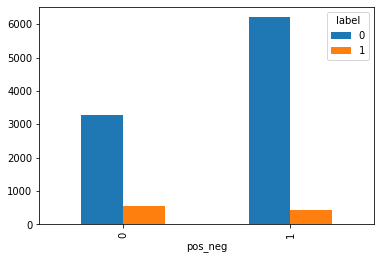

In [45]:
sentimentwise_grp = task1_df.groupby(['pos_neg', 'label']).count()
sentimentwise_grp['orig_label'].unstack().plot(kind='bar')

In [46]:
sentimentwise_grp['keyword']

pos_neg  label
0        0        3273
         1         554
1        0        6203
         1         439
Name: keyword, dtype: int64

In [ ]:
task1_df.to_csv("/content/drive/MyDrive/ColabNotebooks/task1_posneg.tsv", index=False, sep="\t")

In [ ]:
pcl_df = task1_df[task1_df['label'] == 1]
sentences = pcl_df['text'].tolist()
sentences[3:6]

['in september , major nottle set off on foot from melbourne to canberra to plead for a national solution to the homeless problem .',
 "the demographics of pakistan and india are very similar . poverty is a widespread issue . according to the fao , 40 percent of children in pakistan are malnourished and underweight due to lack of access to adequate food . and this is not because there is n't enough ; pakistan is the 8th largest food producing country , however , 50 percent of the population is food insecure . with the massive income inequality that persists , rha is a brilliant movement . we collect leftover or extra food from restaurants and distribute it to the homeless and hungry in the locality .",
 '"his present "" chambers "" may be quite humble , but shiyani has the tiny space very neatly organized and clean . many people pass him by but do not manage to see him , because the space is partially hidden behind trees , which gives him a relative privacy . "" there are many homeless

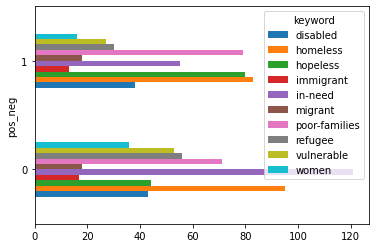

In [ ]:
posneg_group = pcl_df.groupby(['pos_neg','keyword']).count()
posneg_group['label'].unstack().plot(kind='barh')

In [ ]:
import nltk 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
new_dict = []
sent_id = 0
for row in task1_df.itertuples():
  
  words = nltk.word_tokenize(task1_df.loc[row.Index, 'text'])
  #tags = [tag[1] for tag in nltk.pos_tag(words)]
  #print(tokenized_text)
  wordtags = nltk.pos_tag(words)
  for wordtag in wordtags:
    d = {}
    
    word, tag = wordtag
    #print(word,tag, sent_id)
    d['sent_id'] = sent_id 
    d['word'] = word
    d['tag'] = tag
    d['label'] = task1_df.loc[row.Index, 'label']
    d['country'] = task1_df.loc[row.Index, 'country']
    d['keyword'] = task1_df.loc[row.Index, 'keyword']
    new_dict.append(d)
  sent_id += 1
  #new_dict.append(d)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
new_dict[:20]

[{'country': 'ph',
  'keyword': 'hopeless',
  'label': 0,
  'sent_id': 0,
  'tag': 'PRP',
  'word': 'we'},
 {'country': 'ph',
  'keyword': 'hopeless',
  'label': 0,
  'sent_id': 0,
  'tag': 'VBP',
  'word': "'re"},
 {'country': 'ph',
  'keyword': 'hopeless',
  'label': 0,
  'sent_id': 0,
  'tag': 'VBG',
  'word': 'living'},
 {'country': 'ph',
  'keyword': 'hopeless',
  'label': 0,
  'sent_id': 0,
  'tag': 'IN',
  'word': 'in'},
 {'country': 'ph',
  'keyword': 'hopeless',
  'label': 0,
  'sent_id': 0,
  'tag': 'NNS',
  'word': 'times'},
 {'country': 'ph',
  'keyword': 'hopeless',
  'label': 0,
  'sent_id': 0,
  'tag': 'IN',
  'word': 'of'},
 {'country': 'ph',
  'keyword': 'hopeless',
  'label': 0,
  'sent_id': 0,
  'tag': 'JJ',
  'word': 'absolute'},
 {'country': 'ph',
  'keyword': 'hopeless',
  'label': 0,
  'sent_id': 0,
  'tag': 'NN',
  'word': 'insanity'},
 {'country': 'ph',
  'keyword': 'hopeless',
  'label': 0,
  'sent_id': 0,
  'tag': ',',
  'word': ','},
 {'country': 'ph',
  'ke

In [ ]:
pcldf = pd.DataFrame(new_dict, dtype=np.int64)

pcldf[pcldf['sent_id']==2.0]

,sent_id,word,tag,label,country,keyword
164,2,``,``,0,ie,immigrant
165,2,white,JJ,0,ie,immigrant
166,2,house,NN,0,ie,immigrant
167,2,press,NN,0,ie,immigrant
168,2,secretary,NN,0,ie,immigrant
169,2,sean,JJ,0,ie,immigrant
170,2,spicer,NN,0,ie,immigrant
171,2,said,VBD,0,ie,immigrant
172,2,that,IN,0,ie,immigrant
173,2,the,DT,0,ie,immigrant


In [ ]:
from collections import Counter
s = pcldf['word'].value_counts() 
c = Counter(s.to_dict())
c.most_common(100)

[('the', 25851),
 (',', 21705),
 ('.', 18433),
 ('to', 14116),
 ('of', 13916),
 ('and', 12819),
 ('in', 11007),
 ('a', 9172),
 ('``', 8648),
 ("''", 8622),
 ('for', 4890),
 ('that', 4837),
 ('is', 4511),
 ('are', 3406),
 ('on', 3295),
 ("'s", 3106),
 ('with', 3021),
 ('as', 2987),
 ('from', 2631),
 ('it', 2583),
 ('have', 2372),
 ('was', 2286),
 ('be', 2241),
 ('by', 2230),
 ('their', 2170),
 ('said', 2160),
 ('they', 2008),
 ('who', 1996),
 ('at', 1975),
 ('has', 1914),
 ('not', 1842),
 ('people', 1840),
 ('he', 1821),
 ('this', 1733),
 ('women', 1705),
 ('an', 1576),
 ('we', 1483),
 ('i', 1480),
 ('but', 1444),
 ('were', 1371),
 ('need', 1344),
 ('families', 1341),
 ('or', 1315),
 ('will', 1308),
 ('immigrants', 1292),
 ('more', 1271),
 ("'", 1260),
 ('vulnerable', 1202),
 (')', 1192),
 ('his', 1185),
 ('(', 1181),
 ('poor', 1173),
 ('disabled', 1123),
 ('which', 1091),
 ('been', 1054),
 ('children', 1038),
 ('--', 1033),
 ('homeless', 1031),
 ('them', 1006),
 ('also', 984),
 ('all',

In [ ]:
pcldf[pcldf['label'] == 1].groupby(['tag', 'word']).count()[17:].T

tag     CC                        ...  WRB                               ``
word     & ..  <   and both  but  ... when whenever where whereby why    ``
sent_id  9  1  5  1547    1  161  ...   98        2    57       2  25  1061
label    9  1  5  1547    1  161  ...   98        2    57       2  25  1061
country  9  1  5  1547    1  161  ...   98        2    57       2  25  1061
keyword  9  1  5  1547    1  161  ...   98        2    57       2  25  1061

[4 rows x 9230 columns]

In [ ]:
dpm.load_task2()
task2_df = dpm.train_task2_df
task2_df

Map of label to numerical label:
{'Unbalanced_power_relations': 0, 'Shallow_solution': 1, 'Presupposition': 2, 'Authority_voice': 3, 'Metaphors': 4, 'Compassion': 5, 'The_poorer_the_merrier': 6}


,par_id,art_id,text,keyword,country,label
0,4046,@@14767805,we also know that they can benefit by receivin...,hopeless,us,"[1, 0, 0, 1, 0, 0, 0]"
1,1279,@@7896098,pope francis washed and kissed the feet of mus...,refugee,ng,"[0, 1, 0, 0, 0, 0, 0]"
2,8330,@@17252299,many refugees do n't want to be resettled anyw...,refugee,ng,"[0, 0, 1, 0, 0, 0, 0]"
3,4063,@@3002894,"""budding chefs , like """" fred """" , """" winston ...",in-need,ie,"[1, 0, 0, 1, 1, 1, 0]"
4,4089,@@25597822,"""in a 90-degree view of his constituency , one...",homeless,pk,"[1, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...
988,873,@@20374243,citing the fact that these kids who died at go...,poor-families,sg,"[1, 0, 0, 0, 1, 0, 0]"
989,10070,@@15573661,fern ? ndez was a well-known philanthropist wh...,disabled,ng,"[1, 0, 0, 0, 0, 0, 0]"
990,6484,@@2559173,"touched much by their plight , commanding offi...",homeless,lk,"[1, 0, 0, 0, 0, 1, 0]"
991,6249,@@1947926,she reiterated her ministry 's commitment to p...,women,gh,"[1, 0, 0, 0, 0, 0, 0]"


In [ ]:
col = {'Unbalanced_power_relations': 0, 'Shallow_solution': 1, 'Presupposition': 2, 'Authority_voice': 3, 'Metaphors': 4, 'Compassion': 5, 'The_poorer_the_merrier': 6}
for v in list(col.values()):
  task2_df[v] = range(len(task2_df))

In [ ]:
task2_df

,par_id,art_id,text,keyword,country,label,0,1,2,3,4,5,6
0,4046,@@14767805,we also know that they can benefit by receivin...,hopeless,us,"[1, 0, 0, 1, 0, 0, 0]",0,0,0,0,0,0,0
1,1279,@@7896098,pope francis washed and kissed the feet of mus...,refugee,ng,"[0, 1, 0, 0, 0, 0, 0]",1,1,1,1,1,1,1
2,8330,@@17252299,many refugees do n't want to be resettled anyw...,refugee,ng,"[0, 0, 1, 0, 0, 0, 0]",2,2,2,2,2,2,2
3,4063,@@3002894,"""budding chefs , like """" fred """" , """" winston ...",in-need,ie,"[1, 0, 0, 1, 1, 1, 0]",3,3,3,3,3,3,3
4,4089,@@25597822,"""in a 90-degree view of his constituency , one...",homeless,pk,"[1, 0, 0, 0, 0, 0, 0]",4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,873,@@20374243,citing the fact that these kids who died at go...,poor-families,sg,"[1, 0, 0, 0, 1, 0, 0]",988,988,988,988,988,988,988
989,10070,@@15573661,fern ? ndez was a well-known philanthropist wh...,disabled,ng,"[1, 0, 0, 0, 0, 0, 0]",989,989,989,989,989,989,989
990,6484,@@2559173,"touched much by their plight , commanding offi...",homeless,lk,"[1, 0, 0, 0, 0, 1, 0]",990,990,990,990,990,990,990
991,6249,@@1947926,she reiterated her ministry 's commitment to p...,women,gh,"[1, 0, 0, 0, 0, 0, 0]",991,991,991,991,991,991,991


In [ ]:
for row in task2_df.itertuples():
  labels = task2_df.loc[row.Index, 'label']
  for label,key in zip(labels,list(col.values())) :
    task2_df.loc[row.Index, key] = label

In [ ]:
task2_df.columns.values

array(['par_id', 'art_id', 'text', 'keyword', 'country', 'label', 0, 1, 2,
       3, 4, 5, 6], dtype=object)

In [ ]:
clean_task2_df = task2_df[['par_id', 'art_id', 'text', 'keyword', 'country', 0, 1, 2,
       3, 4, 5, 6]]
clean_task2_df

,par_id,art_id,text,keyword,country,0,1,2,3,4,5,6
0,4046,@@14767805,we also know that they can benefit by receivin...,hopeless,us,1,0,0,1,0,0,0
1,1279,@@7896098,pope francis washed and kissed the feet of mus...,refugee,ng,0,1,0,0,0,0,0
2,8330,@@17252299,many refugees do n't want to be resettled anyw...,refugee,ng,0,0,1,0,0,0,0
3,4063,@@3002894,"""budding chefs , like """" fred """" , """" winston ...",in-need,ie,1,0,0,1,1,1,0
4,4089,@@25597822,"""in a 90-degree view of his constituency , one...",homeless,pk,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
988,873,@@20374243,citing the fact that these kids who died at go...,poor-families,sg,1,0,0,0,1,0,0
989,10070,@@15573661,fern ? ndez was a well-known philanthropist wh...,disabled,ng,1,0,0,0,0,0,0
990,6484,@@2559173,"touched much by their plight , commanding offi...",homeless,lk,1,0,0,0,0,1,0
991,6249,@@1947926,she reiterated her ministry 's commitment to p...,women,gh,1,0,0,0,0,0,0


In [ ]:
clean_task2_df.groupby([0]).count()

,par_id,art_id,text,keyword,country,1,2,3,4,5,6
0,,,,,,,,,,,
0,277,277,277,277,277,277,277,277,277,277,277
1,716,716,716,716,716,716,716,716,716,716,716


In [ ]:
clean_task2_df[range(7)].corr()

,0,1,2,3,4,5,6
0,1.000000,0.218184,-0.276755,-0.057702,-0.191705,-0.356097,-0.078136
1,0.218184,1.000000,-0.188950,-0.140327,-0.100778,-0.200552,-0.075861
2,-0.276755,-0.188950,1.000000,0.160584,0.100059,0.189206,0.048733
3,-0.057702,-0.140327,0.160584,1.000000,0.050106,-0.050830,-0.027497
4,-0.191705,-0.100778,0.100059,0.050106,1.000000,0.207168,0.013671
5,-0.356097,-0.200552,0.189206,-0.050830,0.207168,1.000000,-0.029673
6,-0.078136,-0.075861,0.048733,-0.027497,0.013671,-0.029673,1.000000


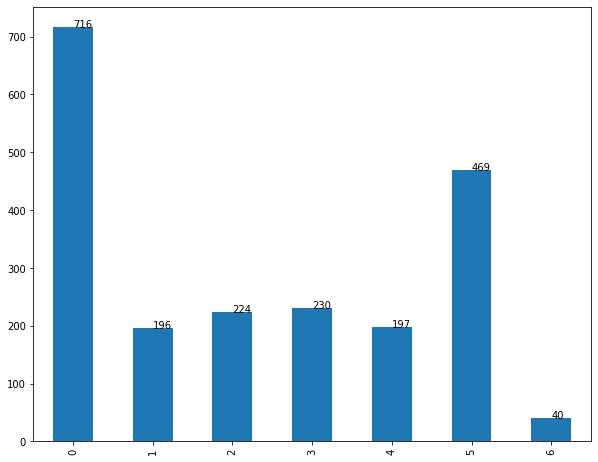

In [ ]:
pcl_label_counts = clean_task2_df[range(7)]

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
df = pcl_label_counts.sum(axis=0)
ax = df.plot.bar()
for i, each in zip(df.index, range(7)):
    #for col in range(7):
        y = df[ each]
        ax.text(i, y, y)

In [ ]:
!pip install imbalanced-learn

In [ ]:
#Return the f1 Score
def train_model(classifier, feature_vector_train, label, feature_vector_valid):
  # fit the training dataset on the classifier
  classifier.fit(feature_vector_train, label)

  # predict the labels on validation dataset
  predictions = classifier.predict(feature_vector_valid)
  return metrics.f1_score(valid_y,predictions)

In [ ]:
# from sklearn import model_selection, preprocessing, metrics, linear_model, svm
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.model_selection import train_test_split
# # check version number
# import imblearn
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import AllKNN
# print(imblearn.__version__)
# # transform the dataset
# #SMOTE
# sm = SMOTE(random_state=777)

# trainx, validx , trainy, testy = train_test_split(task1_df['text'], task1_df['label'])
# # word level tf-idf
# print(trainx)
# tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=100000)
# xtrain_tfidf =  tfidf_vect.transform(trainx)
# xvalid_tfidf =  tfidf_vect.transform(validx)
# sm_xtrain_tfidf, sm_train_y = sm.fit_resample(xtrain_tfidf, trainy)

# all_knn = AllKNN(allow_minority=True)
# knn_xtrain_tfidf, knn_train_y = all_knn.fit_resample(xtrain_tfidf, task1_df['label'])
# accuracy = train_model(svm.LinearSVC(),knn_xtrain_tfidf, knn_train_y, validx)
# print ("SVM {0}, WordLevel TFIDF: ".format(sampler), accuracy)

In [ ]:
# Importing stock ml libraries
import numpy as np
import pandas as pd
from sklearn import metrics
import transformers
import torch
import datasets
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import RobertaTokenizer, RobertaModel, RobertaConfig

# Preparing for TPU usage
# import torch_xla
# import torch_xla.core.xla_model as xm
# device = xm.xla_device()

In [ ]:
# # Setting up the device for GPU usage

from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [ ]:
# Sections of config

# Defining some key variables that will be used later on in the training
MAX_LEN = 200
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 4
EPOCHS = 1
LEARNING_RATE = 1e-05
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

https://colab.research.google.com/github/abhimishra91/transformers-tutorials/blob/master/transformers_multi_label_classification.ipynb#scrollTo=PkDGqarcPowL 

In [ ]:
class CustomDataset(Dataset):

    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = dataframe.text
        print(type(self.data), self.data.tolist())
        self.targets = self.data
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        text = " ".join(text.split())

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

In [ ]:
# Creating the dataset and dataloader for the neural network

train_size = 0.8
train_dataset=task2_df.sample(frac=train_size,random_state=200)
test_dataset=task2_df.drop(train_dataset.index).reset_index(drop=True)
train_dataset = train_dataset.reset_index(drop=True)


print("FULL Dataset: {}".format(task2_df.shape))
print("TRAIN Dataset: {}".format(train_dataset.shape))
print("TEST Dataset: {}".format(test_dataset.shape))
print(type(train_dataset.to))
training_set = CustomDataset(train_dataset, tokenizer, MAX_LEN)
testing_set = CustomDataset(test_dataset, tokenizer, MAX_LEN)

FULL Dataset: (993, 13)
TRAIN Dataset: (794, 13)
TEST Dataset: (199, 13)
<class 'pandas.core.frame.DataFrame'>


AttributeError: ignored

In [ ]:
train_dataset.list

AttributeError: ignored

In [ ]:
pd.DataFrame(pcl_label_counts.sum(axis=0)).T

,0,1,2,3,4,5,6
0,716,196,224,230,197,469,40


In [ ]:
from transformers import RobertaConfig, RobertaModel,RobertaForSequenceClassification
configuration = RobertaConfig()
model = RobertaForSequenceClassification(configuration)
configuration = model.config
from transformers import RobertaTokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num)
from datasets import Dataset
dataset = Dataset.from_pandas(task2_df)

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

In [ ]:
dataset

Dataset({
    features: ['par_id', 'art_id', 'keyword', 'country', 'text', 'label', 'orig_label', 'probability'],
    num_rows: 10469
})

In [ ]:
agreed_df = task1_df[task1_df['probability'] == 1]
disagreed_df = task1_df[task1_df['probability'] == 0.5]

In [ ]:
len(agreed_df), len(disagreed_df)

(9064, 1405)

In [ ]:
1405*2/10, 984+281

(281.0, 1265)

In [ ]:
train_df = agreed_df[:6345].append(disagreed_df[:984])[['text', 'label']]
test_df = agreed_df[6345:8158].append(disagreed_df[984:1265])[['text', 'label']]
valid_df = agreed_df[8158:].append(disagreed_df[1265:])[['text', 'label']]
#len(train_df.append(test_df))

In [ ]:
train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)
valid_ds = Dataset.from_pandas(valid_df)
tokenized_train_ds = train_ds.map(lambda x: tokenizer(x["text"],max_length=256, padding="max_length", truncation=True, return_tensors="pt"))
tokenized_test_ds = test_ds.map(lambda x: tokenizer(x["text"],max_length=256, padding="max_length", truncation=True, return_tensors="pt"))
tokenized_valid_ds = valid_ds.map(lambda x: tokenizer(x["text"],max_length=256, padding="max_length", truncation=True, return_tensors="pt"))

  0%|          | 0/7329 [00:00<?, ?ex/s]

  0%|          | 0/2094 [00:00<?, ?ex/s]

  0%|          | 0/1046 [00:00<?, ?ex/s]

In [ ]:
# text = "we find ourselves in this situation because people are living longer and a number of more local factors including that the number of people requiring nursing care in their care home is increasing coupled with the increased demands for council-funded care to vulnerable people within their own homes ."

# tokenizer(text, max_length=256, padding='max_length', return_tensors="pt")

In [ ]:
len("we find ourselves in this situation because people are living longer and a number of more local factors including that the number of people requiring nursing care in their care home is increasing coupled with the increased demands for council-funded care to vulnerable people within their own homes .".split(" "))

49

In [ ]:
tokenized_train_ds = tokenized_train_ds.rename_column("label", "labels")
tokenized_test_ds = tokenized_test_ds.rename_column("label", "labels")
tokenized_valid_ds = tokenized_valid_ds.rename_column("label", "labels")
tokenized_train_ds.set_format("torch")
tokenized_test_ds.set_format("torch")
tokenized_valid_ds.set_format("torch")

In [ ]:
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5)

In [ ]:
small_train_dataset = tokenized_train_ds.shuffle(seed=42).select(range(1000))
small_eval_dataset = tokenized_test_ds.shuffle(seed=42).select(range(1000))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import torch
from transformers import TrainingArguments, Trainer
X_train = list(train_df["text"])
y_train = list(train_df["label"])
X_val = list(valid_df["text"])
y_val = list(valid_df["label"])
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train_tokenized = tokenizer(X_train, padding=True, truncation=True, max_length=512)
X_val_tokenized = tokenizer(X_val, padding=True, truncation=True, max_length=512)

# Create torch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

train_dataset = Dataset(X_train_tokenized, y_train)
val_dataset = Dataset(X_val_tokenized, y_val)

In [ ]:
from transformers import EarlyStoppingCallback
# ----- 2. Fine-tune pretrained model -----#
# Define Trainer parameters
def compute_metrics(p):
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred)
    precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(y_true=labels, y_pred=pred)

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

# Define Trainer
args = TrainingArguments(
    output_dir="output",
    evaluation_strategy="steps",
    eval_steps=500,
    learning_rate = 2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=100,
    seed=0,
    load_best_model_at_end=True,
)
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=10)],
)

In [ ]:
# Train pre-trained model
trainer.train()

***** Running training *****
  Num examples = 7329
  Num Epochs = 100
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 91700


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
500,0.352800,0.279984,0.900574,0.000000,0.000000,0.000000
1000,0.311500,0.270833,0.902486,1.000000,0.019231,0.037736
1500,0.273500,0.213568,0.908222,0.536364,0.567308,0.551402
2000,0.248900,0.316360,0.918738,0.633803,0.432692,0.514286
2500,0.236100,0.324465,0.916826,0.639344,0.375000,0.472727
3000,0.214600,0.410217,0.899618,0.495327,0.509615,0.502370


***** Running Evaluation *****
  Num examples = 1046
  Batch size = 8
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Saving model checkpoint to output/checkpoint-500
Configuration saved in output/checkpoint-500/config.json
Model weights saved in output/checkpoint-500/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 1046
  Batch size = 8
Saving model checkpoint to output/checkpoint-1000
Configuration saved in output/checkpoint-1000/config.json
Model weights saved in output/checkpoint-1000/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 1046
  Batch size = 8
Saving model checkpoint to output/checkpoint-1500
Configuration saved in output/checkpoint-1500/config.json
Model weights saved in output/checkpoint-1500/pytor

TrainOutput(global_step=3000, training_loss=0.2728869272867839, metrics={'train_runtime': 1515.6447, 'train_samples_per_second': 483.557, 'train_steps_per_second': 60.502, 'total_flos': 6309139996477440.0, 'train_loss': 0.2728869272867839, 'epoch': 3.27})

In [ ]:
# ----- 3. Predict -----#
# Load test data
X_test = list(test_df["text"])
X_test_tokenized = tokenizer(X_test, padding=True, truncation=True, max_length=512)

# Create torch dataset
test_dataset = Dataset(X_test_tokenized)

# Load trained model
model_path = "output/checkpoint-3000"
model = RobertaForSequenceClassification.from_pretrained(model_path, num_labels=2)

# Define test trainer
test_trainer = Trainer(model)

# Make prediction
raw_pred, _, _ = test_trainer.predict(test_dataset)

# Preprocess raw predictions
y_pred = np.argmax(raw_pred, axis=1)

loading configuration file output/checkpoint-3000/config.json
Model config RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.13.0",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

loading weights file output/checkpoint-3000/pytorch_model.bin
All model checkpoint weights were used when initializing RobertaForSequenceClassification.

All the weights of Ro

In [ ]:
raw_pred

array([[ 1.3477561 , -1.2825938 ],
       [-2.5208323 ,  2.5151947 ],
       [ 3.1663744 , -3.0755968 ],
       ...,
       [ 3.032878  , -2.928387  ],
       [ 0.42645404, -0.28499973],
       [ 2.2134802 , -2.1558084 ]], dtype=float32)

In [ ]:
y_pred.tofile("")

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
ypreds = [[y] for y in y_pred]
ypreds

[[0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0]

In [ ]:
!mkdir ref res

mkdir: cannot create directory ‘ref’: File exists
mkdir: cannot create directory ‘res’: File exists


In [ ]:
# helper function to save predictions to an output file
def labels2file(p, outf_path):
	with open(outf_path,'w') as outf:
		for pi in p:
			outf.write(','.join([str(k) for k in pi])+'\n')

In [ ]:
labels2file(test_df.label.apply(lambda x:[x]).tolist(), os.path.join('ref/', 'task1.txt'))

In [ ]:
labels2file(ypreds, os.path.join('res/', 'task1.txt'))

In [ ]:
!python3 evaluation.py . .

In [ ]:
!cat scores.txt

task1_precision:0.4576271186440678
task1_recall:0.45251396648044695
task1_f1:0.4550561797752809


In [ ]:
# tf_train_dataset = tokenized_train_ds.remove_columns(["text"])#.with_format("torch")
# tf_eval_dataset = tokenized_valid_ds.remove_columns(["text"])#.with_format("torch")

In [ ]:
# from torch.utils.data import DataLoader

# train_dataloader = DataLoader(tf_train_dataset, shuffle=True, batch_size=16)
# eval_dataloader = DataLoader(tf_eval_dataset, batch_size=16)

In [ ]:
# train_dataloader.dataset[0], train_dataloader.dataset[1]

In [ ]:
# from transformers import get_scheduler

# num_epochs = 3
# num_training_steps = num_epochs * len(train_dataset)
# lr_scheduler = get_scheduler(
#     "linear",
#     optimizer=optimizer,
#     num_warmup_steps=0,
#     num_training_steps=num_training_steps
# )

In [ ]:
# train_dataloader

In [ ]:
# import torch

# device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
# model.to(device)

In [ ]:
# from tqdm.auto import tqdm

# progress_bar = tqdm(range(num_training_steps))

# model.train()
# for epoch in range(num_epochs):
#     for batch in train_dataset:
#         print(batch.items())
#         batch = {k: v.to(device) for k, v in batch.items()}
#         outputs = model(**batch)
#         loss = outputs.loss
#         loss.backward()

#         optimizer.step()
#         lr_scheduler.step()
#         optimizer.zero_grad()
#         progress_bar.update(1)

In [ ]:
# from torchtext.legacy.data import Field, TabularDataset, BucketIterator, Iterator

# # Set tokenizer hyperparameters.
# MAX_SEQ_LEN = 256
# BATCH_SIZE = 16
# PAD_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.pad_token)
# UNK_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.unk_token)


# # Define columns to read.
# label_field = Field(sequential=False, use_vocab=False, batch_first=True)
# text_field = Field(use_vocab=False, 
#                    tokenize=tokenizer.encode, 
#                    include_lengths=False, 
#                    batch_first=True,
#                    fix_length=MAX_SEQ_LEN, 
#                    pad_token=PAD_INDEX, 
#                    unk_token=UNK_INDEX)

In [ ]:
# train_iter, valid_iter = BucketIterator.splits((train_ds, valid_ds),
#                                                batch_size=BATCH_SIZE,
#                                                device=device,
#                                                shuffle=True,
#                                                sort_key=lambda x: len(x.text), 
#                                                sort=True, 
#                                                sort_within_batch=False)
# test_iter = Iterator(test_ds, batch_size=BATCH_SIZE, device=device, train=False, shuffle=False, sort=False)

# for (source, target), _ in train_iter:
#     mask = (source != PAD_INDEX).type(torch.uint8)

#     y_pred = model(input_ids=source,  
#                    attention_mask=mask)

In [ ]:
# # Model with classifier layers on top of RoBERTa
# class ROBERTAClassifier(torch.nn.Module):
#     def __init__(self, dropout_rate=0.3):
#         super(ROBERTAClassifier, self).__init__()
        
#         self.roberta = RobertaModel.from_pretrained('roberta-base')
#         self.d1 = torch.nn.Dropout(dropout_rate)
#         self.l1 = torch.nn.Linear(768, 64)
#         self.bn1 = torch.nn.LayerNorm(64)
#         self.d2 = torch.nn.Dropout(dropout_rate)
#         self.l2 = torch.nn.Linear(64, 2)
        
#     def forward(self, input_ids, attention_mask):
#         _, x = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
#         x = self.d1(x)
#         x = self.l1(x)
#         x = self.bn1(x)
#         x = torch.nn.Tanh()(x)
#         x = self.d2(x)
#         x = self.l2(x)
        
#         return x 

In [ ]:
# # Set tokenizer hyperparameters.
# MAX_SEQ_LEN = 256
# BATCH_SIZE = 16
# PAD_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.pad_token)
# UNK_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.unk_token)


# # Define columns to read.
# label_field = Field(sequential=False, use_vocab=False, batch_first=True)
# text_field = Field(use_vocab=False, 
#                    tokenize=tokenizer.encode, 
#                    include_lengths=False, 
#                    batch_first=True,
#                    fix_length=MAX_SEQ_LEN, 
#                    pad_token=PAD_INDEX, 
#                    unk_token=UNK_INDEX)

# fields = {'text' : ('text', text_field), 'label' : ('label', label_field)}


# # Read preprocessed CSV into TabularDataset and split it into train, test and valid.
# train_data, valid_data, test_data = TabularDataset(path=f"{data_path}/prep_news.csv", 
#                                                    format='CSV', 
#                                                    fields=fields, 
#                                                    skip_header=False).split(split_ratio=[0.70, 0.2, 0.1], 
#                                                                             stratified=True, 
#                                                                             strata_field='label')

# # Create train and validation iterators.
# train_iter, valid_iter = BucketIterator.splits((train_data, valid_data),
#                                                batch_size=BATCH_SIZE,
#                                                device=device,
#                                                shuffle=True,
#                                                sort_key=lambda x: len(x.titletext), 
#                                                sort=True, 
#                                                sort_within_batch=False)

# # Test iterator, no shuffling or sorting required.
# test_iter = Iterator(test_data, batch_size=BATCH_SIZE, device=device, train=False, shuffle=False, sort=False)


In [ ]:
# # Create sentence and label lists
# sentences = train_df.text.values

# # We need to add special tokens at the beginning and end of each sentence for BERT to work properly
# sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]
# labels = train_df.label.values
# tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
# print ("Tokenize the first sentence:")
# print (tokenized_texts[10])

In [ ]:
# import torch
# for text, label in tokenized_train_ds.get_index()

In [ ]:
# shuffled_dataset = dataset.shuffle()
# train_ds, test_ds = Dataset.from_pandas(task1_df, split=['train', 'test'])
# tokenized_dataset = dataset.map(lambda x: tokenizer(x["text"]))

In [ ]:
# train_ds, test_ds = Dataset.from_pandas(task1_df, split=['train', 'test'])

In [ ]:
# Same for subtask 2
dpm.load_task2()
# which we can then access as a dataframe
task2_df = dpm.train_task2_df.head()

Map of label to numerical label:
{'Unbalanced_power_relations': 0, 'Shallow_solution': 1, 'Presupposition': 2, 'Authority_voice': 3, 'Metaphors': 4, 'Compassion': 5, 'The_poorer_the_merrier': 6}


In [ ]:
task2_df.head()

,par_id,art_id,text,keyword,country,label
0,4046,@@14767805,we also know that they can benefit by receivin...,hopeless,us,"[1, 0, 0, 1, 0, 0, 0]"
1,1279,@@7896098,pope francis washed and kissed the feet of mus...,refugee,ng,"[0, 1, 0, 0, 0, 0, 0]"
2,8330,@@17252299,many refugees do n't want to be resettled anyw...,refugee,ng,"[0, 0, 1, 0, 0, 0, 0]"
3,4063,@@3002894,"""budding chefs , like """" fred """" , """" winston ...",in-need,ie,"[1, 0, 0, 1, 1, 1, 0]"
4,4089,@@25597822,"""in a 90-degree view of his constituency , one...",homeless,pk,"[1, 0, 0, 0, 0, 0, 0]"
